In [30]:
import pandas as pd
import matplotlib as mp
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [31]:
df=pd.read_csv("air.csv")

In [32]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time  
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek  
df['Month'] = df['Date'].dt.month  


In [33]:
df=df.replace(-200,np.nan)

In [34]:
num_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH', 'NMHC(GT)']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [35]:
for col in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    df[col].fillna(round(df[col].median(), 2), inplace=True)

C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\2957747124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(round(df[col].median(), 2), inplace=True)
C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\2957747124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [36]:
for col in ['T', 'RH', 'AH']:
    df[col].fillna(round(df[col].mean(), 2), inplace=True)

C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\4268329491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(round(df[col].mean(), 2), inplace=True)


In [37]:
knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 2:] = knn_imputer.fit_transform(df.iloc[:, 2:])
df.round(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek,Month
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.76,18,2,3
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.73,19,2,3
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.75,20,2,3
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.79,21,2,3
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.79,22,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,360.8,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.76,10,0,4
9353,2005-04-04,11:00:00,2.4,1163.0,360.8,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.71,11,0,4
9354,2005-04-04,12:00:00,2.4,1142.0,360.8,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.64,12,0,4
9355,2005-04-04,13:00:00,2.1,1003.0,344.4,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.51,13,0,4


KNN imputer is used as it helps us find the missing values at a better accuracy

In [38]:
scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
df.to_csv("scaled_air.csv", index=False)


C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\2413665029.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.93913327 1.08358325 1.22803323 ... 0.0724334  0.21688338 0.36133336]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\2413665029.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.50491507 -0.50491507 -0.50491507 ... -1.50480721 -1.50480721
 -1.50480721]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
C:\Users\chyta\AppData\Local\Temp\ipykernel_9496\2413665029.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.96287

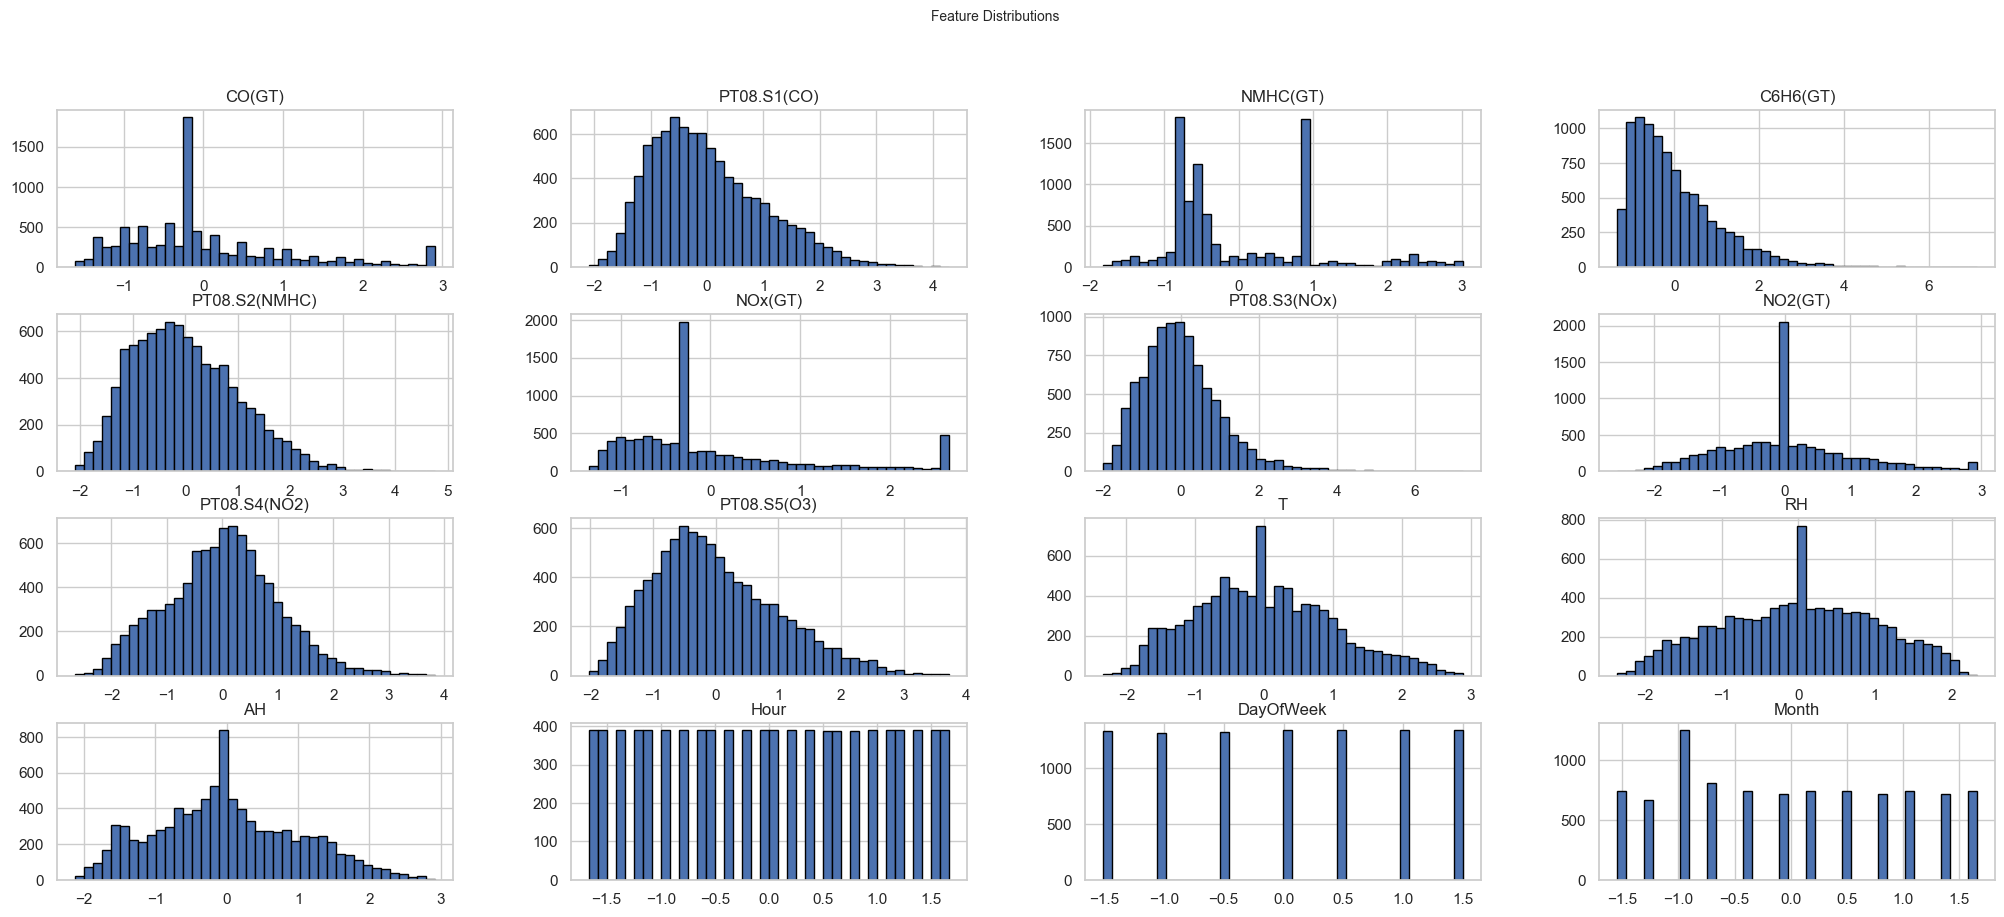

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\chyta\.ipython\scaled_air.csv")


df.hist(figsize=(25,10), bins=40, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=10)
plt.show()

